In [11]:
import pandas as pd
from pprint import pprint
import toyplot as tp
import numpy as np
import seaborn as sns
import os.path
import sys

(8191, 88)


,PMID,Citation,Year,Title,Abstract.Note,Author Type,Cancer Site,DCCPS Program,URL,Resilience,Biomarkers,Conditions,Stressors
0,15821561.0,"Penson DF, McLerran D, Feng Z, Li L, Albertsen...",2005,5-year urinary and sexual outcomes after radic...,PURPOSE: Prior studies of postoperative outcom...,"NCI Researcher, Extramural Researcher",NaN,"Health Services and Economics Branch, Surveill...",http://www.ncbi.nlm.nih.gov/pubmed?Db=PubMed&C...,0,1,0,0
1,16672309.0,"Freedman LS, Potischman N, Kipnis V, Midthune ...",2006,A comparison of two dietary instruments for ev...,BACKGROUND: Previous research suggests food di...,"NCI Researcher, Extramural Researcher",NaN,"Statistical Research and Applications, Surveil...",http://www.ncbi.nlm.nih.gov/pubmed?Db=PubMed&C...,0,0,1,0
2,26448606.0,"Lin CC, Mitra R, Cheng F, Zhao Z. A cross-canc...",2015,A cross-cancer differential co-expression netw...,MicroRNAs (miRNAs) are small non-coding RNAs t...,"NCI Researcher, Extramural Researcher","Stomach, Ovary, Prostate, Digestive Organs, Fe...",Epidemiology and Genomics Research Program,http://www.ncbi.nlm.nih.gov/pubmed?Db=PubMed&C...,0,1,0,0
3,26176379.0,"Blake KD, Kaufman AR, Lorenzo J, Augustson EM....",2015,A descriptive study of television news coverag...,There is a positive correlation between recall...,"NCI Researcher, Extramural Researcher",NaN,Behavioral Research Program,http://www.ncbi.nlm.nih.gov/pubmed?Db=PubMed&C...,0,0,0,0
4,23910630.0,"Eggly S, Barton E, Winckles A, Penner LA, Albr...",2015,A disparity of words: racial differences in on...,BACKGROUND: African Americans are consistently...,"NCI Researcher, Extramural Researcher",NaN,Behavioral Research Program,http://www.ncbi.nlm.nih.gov/pubmed?Db=PubMed&C...,0,0,0,0


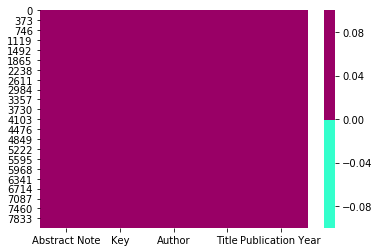

In [15]:

df = pd.read_csv(sys.path[0]+"/datasets/orginial_dataset.csv")
cancer_df = pd.read_csv(sys.path[0]+"/datasets/validation.csv")
def missing_data(df_t, drop = []):
    if drop != []:
        df_t = df_t[drop]
        
    cols = df_t.columns 

    colours = ['#33FFCC', '#990066'] # specify the colours - yellow is missing. blue is not missing.
    sns.heatmap(df_t[cols].isnull(), cmap=sns.color_palette(colours))
missing_data(df, ["Abstract Note", "Key", "Author", "Title","Publication Year" ])
df = df.dropna(subset=["Abstract Note", "Key", "Author", "Title","Publication Year" ], how="any")
df.to_csv("ridout_metanalysis_deduped_20180919_na_dropped.csv")
print(df.shape)
cancer_df.head()


In [16]:
def author_occurence(col: list):
    """Find the number of occurences of a author in a list"""
    counts = {}
    for i in col:
        auths = i.split(";")
        for auth in auths:
            if auth in counts.keys():
                counts[auth]+=1
            else:
                counts[auth]=1
    return counts


def auth_list(col: list):
    final_list = []
    for i in col:
        i = i.split(";")
        for j in i:
            final_list.append(j)
    return auth_list
vals = author_occurence(list(df["Author"]))
freq_dist = {}
for i in vals.keys():
    val = str(vals[i])
    if val in freq_dist.keys():
        freq_dist[val]+=1
    else:
        freq_dist[val] = 1
for i in freq_dist.keys():
    print(str(freq_dist[i]),"Authors were published",i, "times")
#Attard, Gerhardt random 
canvas = tp.Canvas(width=500, height=300)
axes = canvas.cartesian(yscale="log", xlabel="Number of times an Author is Published", ylabel="Count", label="Author Analysis")
counts =[int(vals[i]) for i in vals.keys()]
mark = axes.bars(np.histogram(counts, 20))

34633 Authors were published 1 times
2584 Authors were published 2 times
27 Authors were published 6 times
727 Authors were published 3 times
159 Authors were published 4 times
74 Authors were published 5 times
11 Authors were published 8 times
4 Authors were published 11 times
6 Authors were published 10 times
2 Authors were published 14 times
7 Authors were published 9 times
2 Authors were published 13 times
2 Authors were published 12 times
3 Authors were published 15 times
12 Authors were published 7 times


<svg class="toyplot-canvas-Canvas" height="300.0px" id="tcc06743267cb406d99d95b4111b8b04c" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 500.0 300.0" width="500.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 5 10 15 Number of times an Author is Published 0 10 0 10 1 10 2 10 3 10 4 10 5 Count Author Analysis

In [17]:
def year_occ(col: list):
    counts = {}
    for i in col:
        i = int(i)
        if i in counts.keys():
            counts[i]+=1
        else:
            counts[i]=1
    return counts

years = [int(i) for i in list(cancer_df["Year"])]

canvas = tp.Canvas(width=500, height=300)
axes = canvas.cartesian(label="Publications per year (Overall)", xlabel="Year", ylabel="Count")
mark = axes.bars(np.histogram(years, 10))


<svg class="toyplot-canvas-Canvas" height="300.0px" id="td9008ea7c0a2404ba855f4922de0987e" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 500.0 300.0" width="500.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 2000 2010 2020 Year 0 100 200 300 Count Publications per year (Overall)

{'materials': 14, 'rocks': 0, 'metals': 19, 'inorganic': 3, 'parental education': 16}
{'material': 72, 'rock': 17, 'metal': 71, 'inorganic': 3, 'parental education': 16}


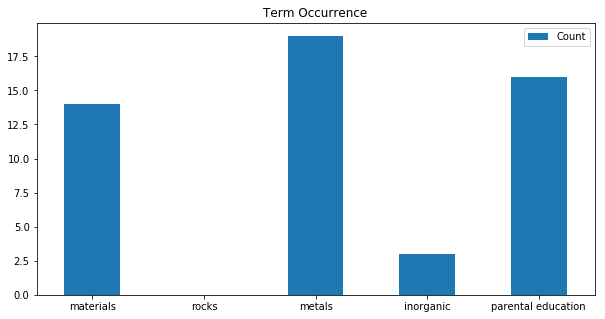

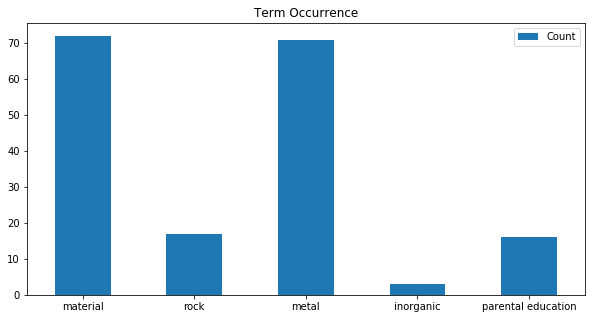

In [18]:
def term_occ(col: list, terms: list, search="", graph=1):
    term_occ_tracker = {i:0 for i in terms}
    for text in col:
        for term in terms:
            if search == "":
                if term in text:
                    term_occ_tracker[term]+=1
            else:
                if search(term, text) >= 1:
                    term_occ_tracker[term]+=1
    if graph == 1:
        temp_df = pd.DataFrame(list(term_occ_tracker.items()), columns=["Term", "Count"], index=term_occ_tracker.keys())
        temp_df.plot.bar(rot=0, figsize=(10,5), title="Term Occurrence")
    return term_occ_tracker
print(term_occ(list(df["Abstract Note"]), ["materials", "rocks", "metals", "inorganic", "parental education"]))
print(term_occ(list(df["Abstract Note"]), ["material", "rock", "metal", "inorganic", "parental education"]))     

{'Riba A Ménard S': 1}
      Year  Count
2015  2015      3
2017  2017      1
2016  2016      1
      Year  Count
2015  2015      3
2016  2016      1
2017  2017      1
      Year  Count
2018  2018    118
2017  2017    176
2016  2016    194
2015  2015    160
2014  2014    160
      Year  Count
1976  1976      1
1977  1977      1
1982  1982      1
1985  1985      2
1987  1987      3


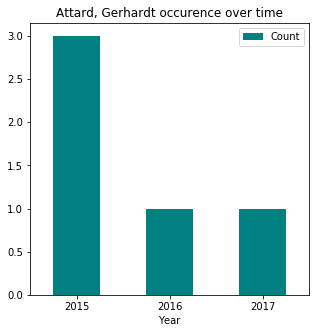

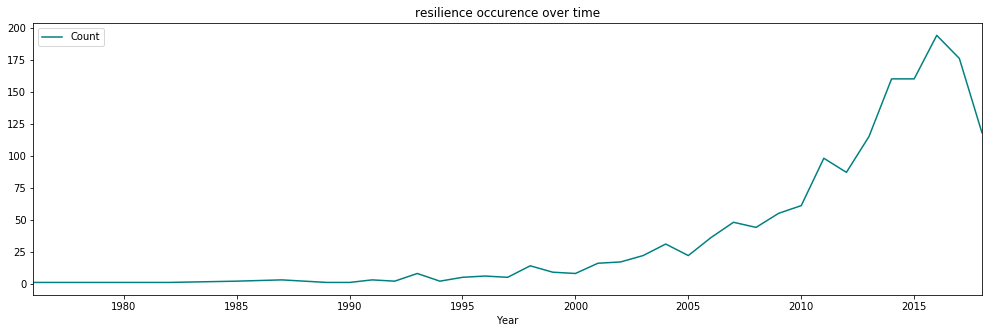

In [19]:

word_usage_df = df[["Key","Abstract Note", "Publication Year"]]
author_df = df[["Author", "Publication Year"]]

def over_time(author, author_list, pub_years, width=300, height=300):
    years = []
    for i in range(len(author_list)):
        if author.lower() in author_list[i].lower():
            years.append(int(pub_years[i]))
    print(years)
    hist_range = len(set(years))
    canvas = tp.Canvas(width=width, height=height)
    axes = canvas.cartesian(label=author+" Publications per year", xlabel="Year", ylabel="Count")
    axes.x.ticks.locator = tp.locator.Uniform(count=len(np.histogram(years, hist_range))+1)
    mark = axes.bars(np.histogram(years, hist_range))

    
def over_time_pd(author, author_list, pub_years, width=300, height=300, search_func="", y= 5, x=10, type="line"):
    years = {}
    for i in range(len(author_list)):
        if search_func == "":
            if author.lower() in author_list[i].lower():
                if pub_years[i] in years.keys():
                    years[int(pub_years[i])]+=1
                else:
                    years[int(pub_years[i])] = 1
        else:
            pass
    over_time_df = pd.DataFrame(list(years.items()), columns=['Year', 'Count'], index=years.keys())
    print(over_time_df.head())
    over_time_df=over_time_df.reindex(sorted(over_time_df["Year"]))
    print(over_time_df.head())
    if type == "line":
        over_time_df.plot.line(rot=0, figsize=(x,y), y="Count", x="Year",color="teal", title=author+" occurence over time")
    elif type == "bar":
        over_time_df.plot.bar(rot=0, figsize=(x,y), y="Count", x="Year",color="teal", title=author+" occurence over time")
    
    
def author_co_currence(auths:list, auths2: list, col: list):
    co_currence = {}
    for z in col:
        for x in range(len(auths)):
            for y in range(len(auths2)):
                i = auths[x]
                j = auths2[y]
                if i != j:
                    if i in z and j in z:
                        if i+" "+j not in co_currence.keys():
                            co_currence[i+" "+j]= 1
                        elif i+" "+j in co_currence.keys():
                            co_currence[i+" "+j]+=1

    return co_currence
only_auths = []
#using Riba A and Ménard S should be only 1 hit for each 


print(author_co_currence(["Riba A"],["Ménard S"], list(author_df["Author"])))
over_time_pd("Attard, Gerhardt", list(author_df["Author"]), list(author_df["Publication Year"]), x=5, y= 5, type="bar")
over_time_pd("resilience", list(word_usage_df["Abstract Note"]), list(word_usage_df["Publication Year"]), x=17, type="line")